<a href="https://colab.research.google.com/github/singhshobhit2056/Hyperparameter-tuning-on-ANN/blob/main/Keras_tuner_in_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Deep Learning/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

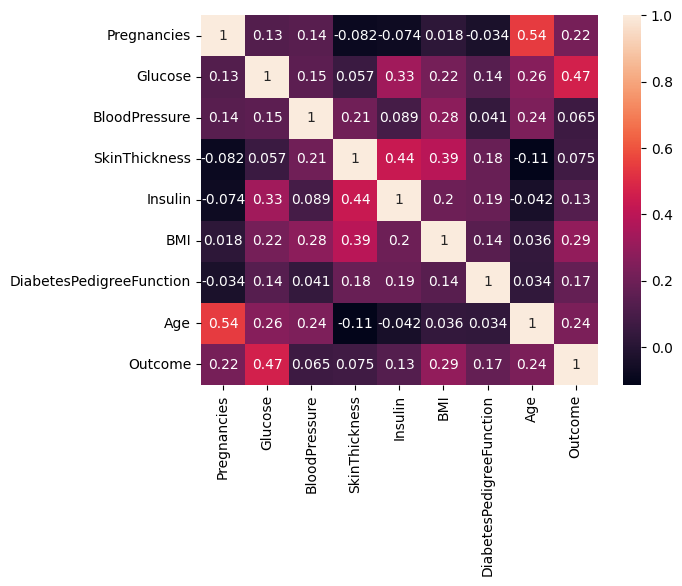

In [6]:
sns.heatmap(df.corr(), annot = True);

In [7]:
x = df.drop('Outcome', axis = 'columns')
y = df['Outcome']
x.shape

(768, 8)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [10]:
model = Sequential()
model.add(Dense(60,activation = 'relu', input_dim = 8))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                540       
                                                                 
 dense_1 (Dense)             (None, 32)                1952      
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2765 (10.80 KB)
Trainable params: 2765 (10.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
20/20 [==============================] - 3s 34ms/step - loss: 4.1327 - accuracy: 0.6498 - val_loss: 0.8475 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 11ms/step - loss: 0.7088 - accuracy: 0.5782 - val_loss: 0.6876 - val_accuracy: 0.5844
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6452 - accuracy: 0.6287 - val_loss: 0.6679 - val_accuracy: 0.6169
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.6097 - accuracy: 0.6645 - val_loss: 0.6429 - val_accuracy: 0.6883
Epoch 5/100
20/20 [==============================] - 0s 15ms/step - loss: 0.6072 - accuracy: 0.6678 - val_loss: 0.6364 - val_accuracy: 0.7273
Epoch 6/100
20/20 [==============================] - 0s 16ms/step - loss: 0.6016 - accuracy: 0.6759 - val_loss: 0.6965 - val_accuracy: 0.6234
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6173 - accuracy: 0.6694 - val_loss: 0.6400 - val_accuracy: 0.7143
Epoch 8

In [14]:
history.history

{'loss': [4.132695198059082,
  0.7087571620941162,
  0.6451501250267029,
  0.6097193956375122,
  0.6072371602058411,
  0.6016391515731812,
  0.6173189282417297,
  0.5802482962608337,
  0.5758445858955383,
  0.5755197405815125,
  0.5726637840270996,
  0.5965644717216492,
  0.5958682894706726,
  0.5838278532028198,
  0.5679471492767334,
  0.585565984249115,
  0.5901363492012024,
  0.5665682554244995,
  0.5908451676368713,
  0.5661989450454712,
  0.5439457297325134,
  0.566466212272644,
  0.6069502234458923,
  0.5712594389915466,
  0.5438437461853027,
  0.5499786734580994,
  0.5388017892837524,
  0.5325055718421936,
  0.590096652507782,
  0.5671164989471436,
  0.5561444163322449,
  0.534082293510437,
  0.54651939868927,
  0.5487625002861023,
  0.543030858039856,
  0.5533000230789185,
  0.5516296029090881,
  0.584633469581604,
  0.565828800201416,
  0.5410953760147095,
  0.5367774963378906,
  0.5383894443511963,
  0.5264319777488708,
  0.5243247747421265,
  0.5258196592330933,
  0.54325252

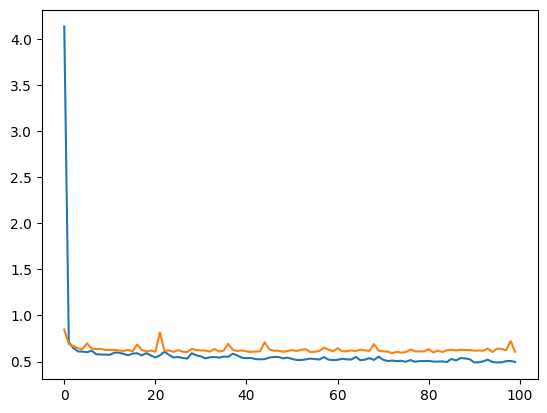

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

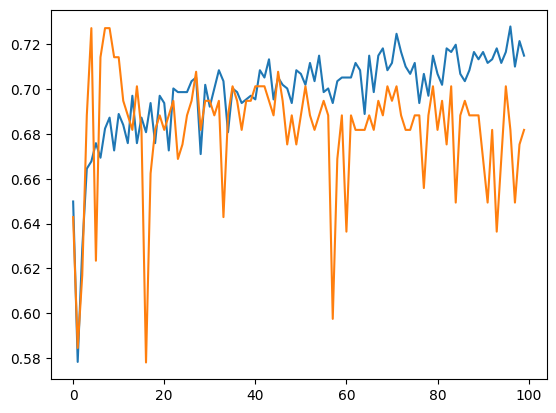

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# KERAS TUNER (Hyperparameter tuning for deep learning)
1. How to select an appropiate optimizer
2. no. of nodes in a layer
3. how to select no. of layers
4. all in one model

In [19]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


1.How to select an appropiate optimizer

In [20]:
import keras_tuner as kt

In [21]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, activation = 'relu', input_dim = 8))
  model.add(Dense(1,activation = 'sigmoid'))

  hyper_param = hp.Choice('optimizer', values = ['sgd', 'adam', 'adadelta', 'rmsprop'])

  model.compile(optimizer = hyper_param , loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [22]:
tuner = kt.RandomSearch(build_model ,objective = 'val_accuracy')

In [23]:
tuner.search(x_train, y_train, epochs = 7, validation_data = (x_test,y_test))

Trial 4 Complete [00h 00m 07s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.6818181872367859
Total elapsed time: 00h 00m 15s


In [24]:
tuner.get_best_hyperparameters()[0].values #fetching the best hyperparameter

{'optimizer': 'rmsprop'}

2. no. of nodes in a layer

In [25]:
def build_model1(hp):
  model1 = Sequential()

  units = hp.Int('units', min_value = 8, max_value = 128, step = 8)

  model1.add(Dense(units = units, activation = 'relu', input_dim = 8))
  model1.add(Dense(1, activation = 'sigmoid',))

  model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model1

In [29]:
tuner = kt.RandomSearch(build_model1, objective = 'val_accuracy', directory = 'my_dir')

In [30]:
tuner.search(x_train,y_train,epochs = 10, validation_data = (x_test,y_test))

Trial 10 Complete [00h 00m 02s]
val_accuracy: 0.7272727489471436

Best val_accuracy So Far: 0.7272727489471436
Total elapsed time: 00h 00m 29s


In [31]:
tuner.get_best_hyperparameters()[0].values #fetching the best hyperparameter

{'units': 128}

3. How to select no. of layers

In [37]:
def build_model2(hp):
  model2 = Sequential()
  model2.add(Dense(128, activation = 'relu', input_dim = 8))

  for i in range(hp.Int('num_layers' ,1,10)):
    model2.add(Dense(50, activation = 'relu'))

  model2.add(Dense(1, activation = 'sigmoid'))

  model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model2

In [38]:
tuner = kt.RandomSearch(build_model2, objective = 'val_accuracy', max_trials = 3, directory = 'my_dir1')

In [39]:
tuner.search(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.7077922224998474

Best val_accuracy So Far: 0.7207792401313782
Total elapsed time: 00h 00m 14s


In [40]:
tuner.get_best_hyperparameters()[0].values #fetching the best hyperparameter

{'num_layers': 7}